In [1]:
%reset
%load_ext autoreload
%autoreload 2

import numpy as np
import seaborn as sns
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from pdf_computer import pdfComputer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Settings for plot
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
# method
approach = 'kde_cuda'
# 1D gamma distribution
k, theta = 9., .5
nzero = 100
ngama = 600
nx    = 30
sample1 = np.random.gamma(shape=k, scale=theta, size=ngama)
sample2 = np.zeros(nzero)
sample  = np.concatenate([sample1, sample2], axis=0)
sample  = sample[:,np.newaxis]
# Compute PDF
pdfsolver1 = pdfComputer(ndim=1, approach=approach, bandwidth='silverman')

t1, pdf1, cd1 = pdfsolver1.computePDF(sample, nbins=[nx], atomCheck=True)
t2, pdf2, cd2 = pdfsolver1.computePDF(sample, nbins=[nx], atomCheck=False)

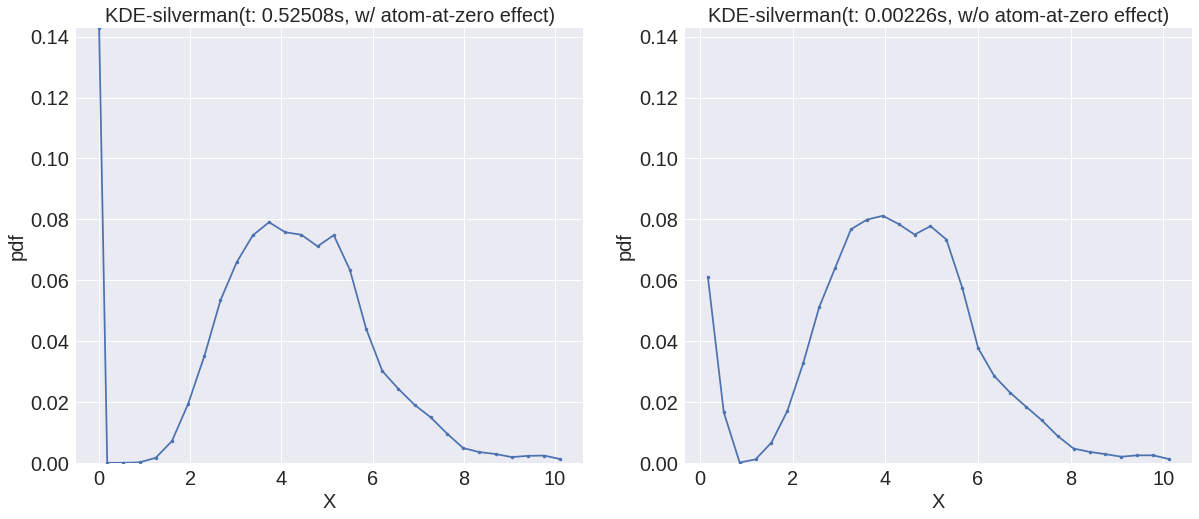

In [3]:
# Plot
ymin, ymax = np.min([pdf1, pdf2]), np.max([pdf1, pdf2])

fig, axes = plt.subplots(1, 2)
ax=axes[0]
ax.plot(cd1[0], pdf1, '.-')
ax.set_ylim([ymin, ymax])
ax.set_title('KDE-silverman(t: %.5fs, w/ atom-at-zero effect)' % t1)
ax.set_xlabel('X')
ax.set_ylabel('pdf')

ax=axes[1]
ax.plot(cd2[0], pdf2, '.-')
ax.set_ylim([ymin, ymax])
ax.set_title('KDE-silverman(t: %.5fs, w/o atom-at-zero effect)' % t2)
ax.set_xlabel('X')
ax.set_ylabel('pdf')

plt.show()

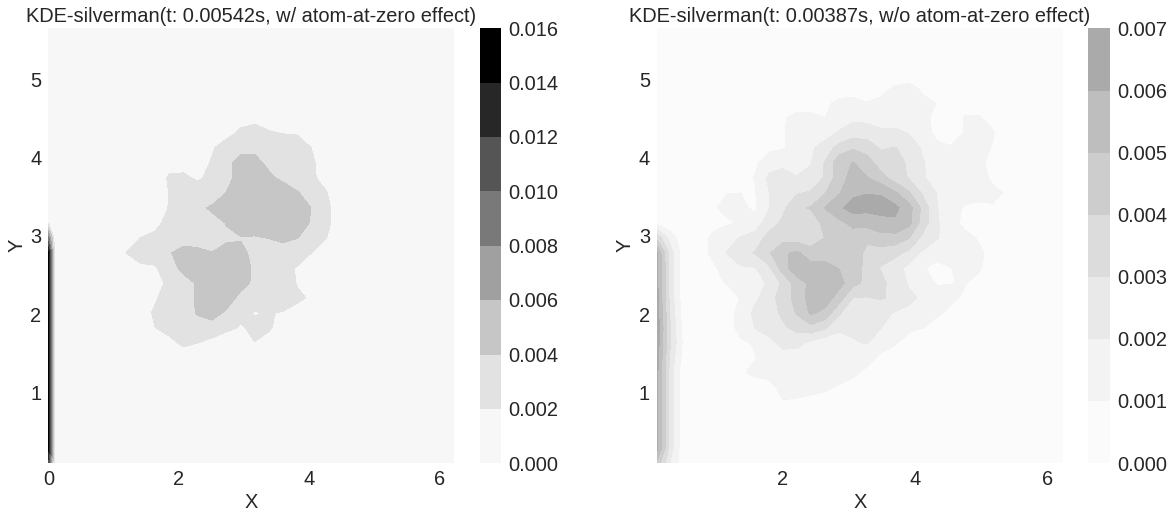

In [4]:
# 2D normal distribution (zero values appear at the x-axis)
# Settings for plot
plt.rcParams["figure.figsize"] = (20,8)
# Parameters
nx, ny = 30, 30
mean = [3, 3]
cov  = [[1, .3], [.3, 1]]
ns1  = 1000
ns2  = 300
# atom-zero-effect at y-axis
sample11  = np.random.multivariate_normal(mean, cov, ns1)
sample11[sample11<0] = 0 # shift all the negative values to zero 
sample12_1 = np.zeros(ns2)
sample12_2 = np.linspace(0, 3, ns2)
sample12 = np.array([sample12_1, sample12_2]).T
sample1  = np.concatenate([sample11, sample12], axis=0)
# Compute PDF
pdfsolver1 = pdfComputer(ndim=2, approach=approach, bandwidth='silverman')
t1, pdf1, cd1 = pdfsolver1.computePDF(sample1, nbins=[nx,ny], atomCheck=True)
t2, pdf2, cd2 = pdfsolver1.computePDF(sample1, nbins=[nx,ny], atomCheck=False)
# plot for 2D testing
xarray, yarray = sample1[:, 0], sample1[:, 1]
xlim, ylim = [xarray.min(), xarray.max()], [yarray.min(), yarray.max()]
xv1, yv1 = np.meshgrid(cd1[0], cd1[1], indexing='ij')
xv2, yv2 = np.meshgrid(cd2[0], cd2[1], indexing='ij')
allpdfv = np.concatenate((pdf1.flatten(), pdf2.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()

fig, axes = plt.subplots(nrows=1, ncols=2)
cs = axes[0].contourf(xv1, yv1, pdf1, xlim=xlim, ylim=ylim,
                        norm=plt.Normalize(vmax=vmax, vmin=vmin))
fig.colorbar(cs, ax=axes[0])
axes[0].set_title('KDE-silverman(t: %.5fs, w/ atom-at-zero effect)' % t1)

cs = axes[1].contourf(xv2, yv2, pdf2, xlim=xlim, ylim=ylim,
                        norm=plt.Normalize(vmax=vmax, vmin=vmin))
fig.colorbar(cs, ax=axes[1])
axes[1].set_title('KDE-silverman(t: %.5fs, w/o atom-at-zero effect)' % t2)

axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.show()

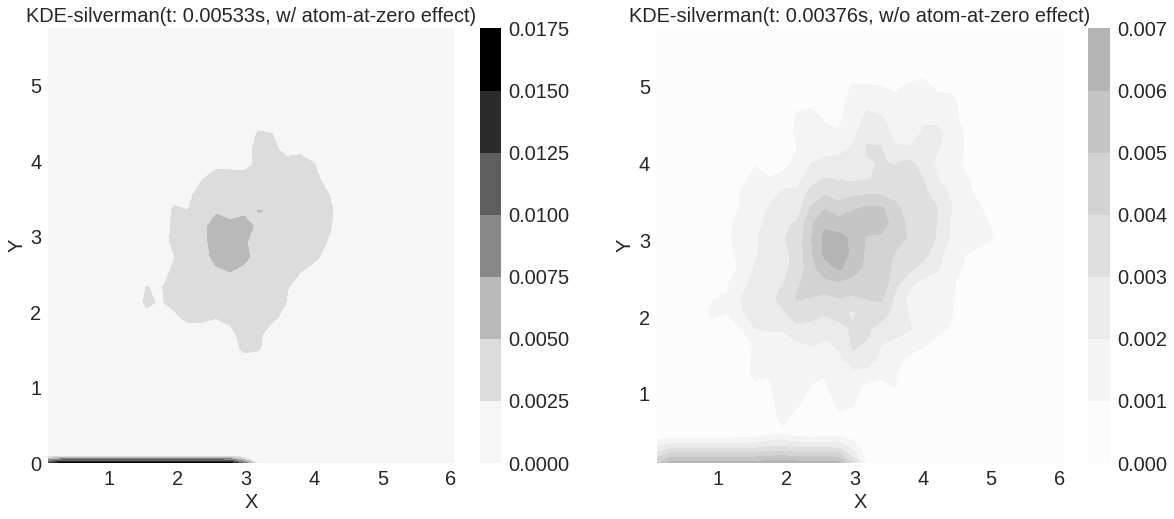

In [5]:
# 2D
# atom-zero-effect at x-axis
sample21  = np.random.multivariate_normal(mean, cov, ns1)
sample21[sample21<0] = 0 # shift all the negative values to zero 
sample22_1 = np.zeros(ns2)
sample22_2 = np.linspace(0, 3, ns2)
sample22 = np.array([sample22_2, sample22_1]).T
sample2  = np.concatenate([sample21, sample22], axis=0)
# Compute PDF
pdfsolver1 = pdfComputer(ndim=2, approach=approach, bandwidth='silverman')
t1, pdf1, cd1 = pdfsolver1.computePDF(sample2, nbins=[nx,ny], atomCheck=True)
t2, pdf2, cd2 = pdfsolver1.computePDF(sample2, nbins=[nx,ny], atomCheck=False)
# plot for 2D testing
xarray, yarray = sample2[:, 0], sample2[:, 1]
xlim, ylim = [xarray.min(), xarray.max()], [yarray.min(), yarray.max()]
xv1, yv1 = np.meshgrid(cd1[0], cd1[1], indexing='ij')
xv2, yv2 = np.meshgrid(cd2[0], cd2[1], indexing='ij')
allpdfv = np.concatenate((pdf1.flatten(), pdf2.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()

fig, axes = plt.subplots(nrows=1, ncols=2)
cs = axes[0].contourf(xv1, yv1, pdf1, xlim=xlim, ylim=ylim,
                        norm=plt.Normalize(vmax=vmax, vmin=vmin))
fig.colorbar(cs, ax=axes[0])
axes[0].set_title('KDE-silverman(t: %.5fs, w/ atom-at-zero effect)' % t1)

cs = axes[1].contourf(xv2, yv2, pdf2, xlim=xlim, ylim=ylim,
                        norm=plt.Normalize(vmax=vmax, vmin=vmin))
fig.colorbar(cs, ax=axes[1])
axes[1].set_title('KDE-silverman(t: %.5fs, w/o atom-at-zero effect)' % t2)

axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.show()

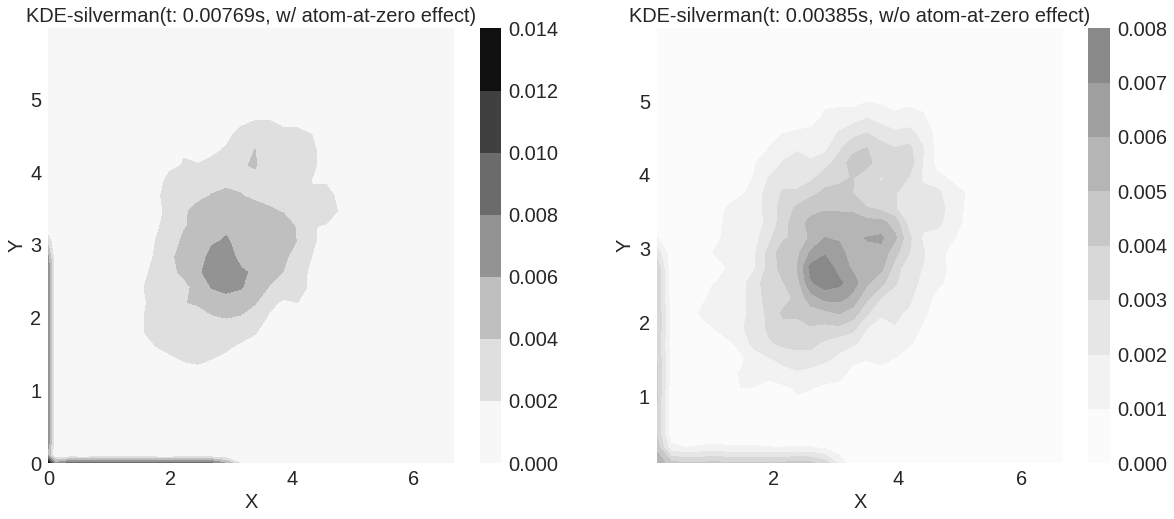

In [6]:
# 2D
# atom-zero-effect at both x-axis and y-axis
sample21  = np.random.multivariate_normal(mean, cov, ns1)
sample21[sample21<0] = 0 # shift all the negative values to zero 
sample22_1 = np.zeros(ns2/2)
sample22_2 = np.linspace(0, 3, ns2/2)
sample22 = np.array([sample22_2, sample22_1]).T
sample23 = np.array([sample22_1, sample22_2]).T
sample2  = np.concatenate([sample21, sample22, sample23], axis=0)
# Compute PDF
pdfsolver1 = pdfComputer(ndim=2, approach=approach, bandwidth='silverman')
t1, pdf1, cd1 = pdfsolver1.computePDF(sample2, nbins=[nx,ny], atomCheck=True)
t2, pdf2, cd2 = pdfsolver1.computePDF(sample2, nbins=[nx,ny], atomCheck=False)
# plot for 2D testing
xarray, yarray = sample2[:, 0], sample2[:, 1]
xlim, ylim = [xarray.min(), xarray.max()], [yarray.min(), yarray.max()]
xv1, yv1 = np.meshgrid(cd1[0], cd1[1], indexing='ij')
xv2, yv2 = np.meshgrid(cd2[0], cd2[1], indexing='ij')
allpdfv = np.concatenate((pdf1.flatten(), pdf2.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()

fig, axes = plt.subplots(nrows=1, ncols=2)
cs = axes[0].contourf(xv1, yv1, pdf1, xlim=xlim, ylim=ylim,
                        norm=plt.Normalize(vmax=vmax, vmin=vmin))
fig.colorbar(cs, ax=axes[0])
axes[0].set_title('KDE-silverman(t: %.5fs, w/ atom-at-zero effect)' % t1)

cs = axes[1].contourf(xv2, yv2, pdf2, xlim=xlim, ylim=ylim,
                        norm=plt.Normalize(vmax=vmax, vmin=vmin))
fig.colorbar(cs, ax=axes[1])
axes[1].set_title('KDE-silverman(t: %.5fs, w/o atom-at-zero effect)' % t2)

axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.show()

In [7]:
# 3D
# Settings for plot
plt.rcParams["figure.figsize"] = (20,10)
# Parameters
nx, ny, nz = 30, 30, 30
mean = [3, 3, 3]
cov  = [[1, .3, .5], [.3, 1, .2], [.5, .2, 1]]
ns1  = 1000
ns2  = 450
# atom-zero-effect at x, y and z axes
sample1  = np.random.multivariate_normal(mean, cov, ns1)
sample1[sample1<0] = 0.01 # shift all the negative values to zero 
sample2_1 = np.zeros(ns2/3)
sample2_2 = np.linspace(0, 3, ns2/3)
sample2 = np.array([sample2_1, sample2_2, sample2_2]).T
sample3 = np.array([sample2_2, sample2_1, sample2_2]).T
sample4 = np.array([sample2_2, sample2_2, sample2_1]).T
sample  = np.concatenate([sample1, sample2, sample3, sample4], axis=0)
# sample  = np.concatenate([sample1, sample2, sample3], axis=0)
# Compute PDF
pdfsolver1 = pdfComputer(ndim=3, approach=approach, bandwidth='silverman')
t1, pdf1, cd1 = pdfsolver1.computePDF(sample, nbins=[nx,ny,nz], atomCheck=True)
t2, pdf2, cd2 = pdfsolver1.computePDF(sample, nbins=[nx,ny,nz], atomCheck=False)
# Calculate pdfxy, pdfxz, pdfyz, pdfx, pdfy and pdfz
pdfx1, pdfy1, pdfz1    = np.sum(pdf1, axis=(1,2)), np.sum(pdf1, axis=(0,2)), np.sum(pdf1, axis=(0,1))
pdfxy1, pdfxz1, pdfyz1 = np.sum(pdf1,axis=(2)),np.sum(pdf1,axis=(0)),np.sum(pdf1,axis=(1))
pdfx2, pdfy2, pdfz2    = np.sum(pdf2, axis=(1,2)), np.sum(pdf2, axis=(0,2)), np.sum(pdf2, axis=(0,1))
pdfxy2, pdfxz2, pdfyz2 = np.sum(pdf2,axis=(2)),np.sum(pdf2,axis=(0)),np.sum(pdf2,axis=(1))

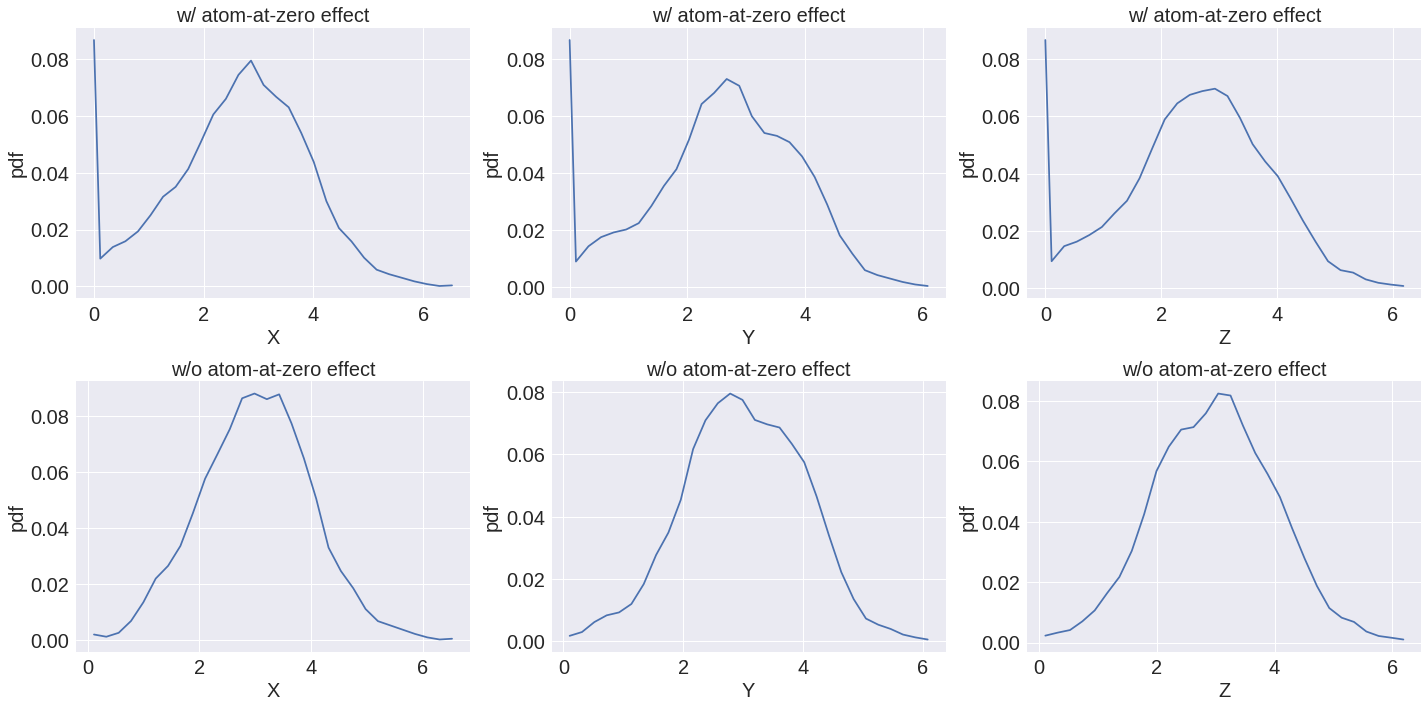

In [8]:
# Plot
xarray, yarray, zarray = sample[:, 0], sample[:, 1], sample[:, 2]
xlim, ylim, zlim = [xarray.min(), xarray.max()], [yarray.min(), yarray.max()], [zarray.min(), zarray.max()]

# xv2, yv2 = np.meshgrid(cd2[0], cd2[1], indexing='ij')
# allpdfv = np.concatenate((pdf1.flatten(), pdf2.flatten()))
# vmax, vmin = allpdfv.max(), allpdfv.min()

fig, axes = plt.subplots(nrows=2, ncols=3)
# pdfx
ax1, ax2 = axes[0,0], axes[1,0]
ax1.plot(cd1[0], pdfx1)
ax2.plot(cd2[0], pdfx2)
ax1.set_xlabel('X')
ax1.set_ylabel('pdf')
ax1.set_title('w/ atom-at-zero effect')
ax2.set_xlabel('X')
ax2.set_ylabel('pdf')
ax2.set_title('w/o atom-at-zero effect')
# pdfy
ax1, ax2 = axes[0,1], axes[1,1]
ax1.plot(cd1[1], pdfy1)
ax2.plot(cd2[1], pdfy2)
ax1.set_xlabel('Y')
ax1.set_ylabel('pdf')
ax1.set_title('w/ atom-at-zero effect')
ax2.set_xlabel('Y')
ax2.set_ylabel('pdf')
ax2.set_title('w/o atom-at-zero effect')
# pdfz
ax1, ax2 = axes[0,2], axes[1,2]
ax1.plot(cd1[2], pdfz1)
ax2.plot(cd2[2], pdfz2)
ax1.set_xlabel('Z')
ax1.set_ylabel('pdf')
ax1.set_title('w/ atom-at-zero effect')
ax2.set_xlabel('Z')
ax2.set_ylabel('pdf')
ax2.set_title('w/o atom-at-zero effect')

plt.tight_layout()
plt.show()

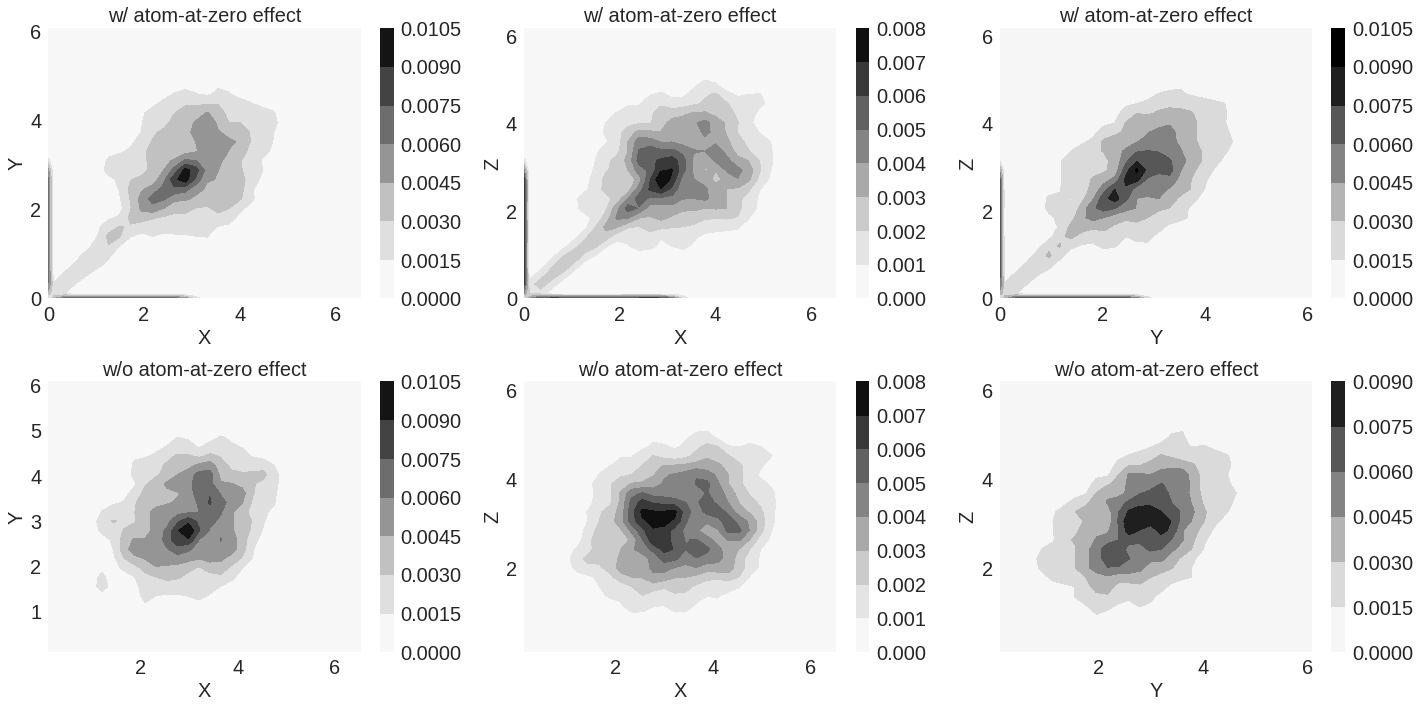

In [9]:
# pdfxy
fig, axes = plt.subplots(nrows=2, ncols=3)
ax1, ax2 = axes[0,0], axes[1,0]
xv1, yv1 = np.meshgrid(cd1[0], cd1[1], indexing='ij')
xv2, yv2 = np.meshgrid(cd2[0], cd2[1], indexing='ij')
allpdfv = np.concatenate((pdfxy1.flatten(), pdfxy2.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()
cs1 = ax1.contourf(xv1, yv1, pdfxy1, xlim=xlim, ylim=ylim,
                      norm=plt.Normalize(vmax=vmax, vmin=vmin))
cs2 = ax2.contourf(xv2, yv2, pdfxy2, xlim=xlim, ylim=ylim,
                      norm=plt.Normalize(vmax=vmax, vmin=vmin))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('w/ atom-at-zero effect')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('w/o atom-at-zero effect')
fig.colorbar(cs1, ax=ax1)
fig.colorbar(cs2, ax=ax2)
# pdfxz
ax1, ax2 = axes[0,1], axes[1,1]
xv1, yv1 = np.meshgrid(cd1[0], cd1[2], indexing='ij')
xv2, yv2 = np.meshgrid(cd2[0], cd2[2], indexing='ij')
allpdfv = np.concatenate((pdfxz1.flatten(), pdfxz2.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()
cs1 = ax1.contourf(xv1, yv1, pdfxz1, xlim=xlim, ylim=ylim,
                      norm=plt.Normalize(vmax=vmax, vmin=vmin))
cs2 = ax2.contourf(xv2, yv2, pdfxz2, xlim=xlim, ylim=ylim,
                      norm=plt.Normalize(vmax=vmax, vmin=vmin))
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_title('w/ atom-at-zero effect')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title('w/o atom-at-zero effect')
fig.colorbar(cs1, ax=ax1)
fig.colorbar(cs2, ax=ax2)
# pdfyz
ax1, ax2 = axes[0,2], axes[1,2]
xv1, yv1 = np.meshgrid(cd1[1], cd1[2], indexing='ij')
xv2, yv2 = np.meshgrid(cd2[1], cd2[2], indexing='ij')
allpdfv = np.concatenate((pdfyz1.flatten(), pdfyz2.flatten()))
vmax, vmin = allpdfv.max(), allpdfv.min()
cs1 = ax1.contourf(xv1, yv1, pdfyz1, xlim=xlim, ylim=ylim,
                      norm=plt.Normalize(vmax=vmax, vmin=vmin))
cs2 = ax2.contourf(xv2, yv2, pdfyz2, xlim=xlim, ylim=ylim,
                      norm=plt.Normalize(vmax=vmax, vmin=vmin))
ax1.set_xlabel('Y')
ax1.set_ylabel('Z')
ax1.set_title('w/ atom-at-zero effect')
ax2.set_xlabel('Y')
ax2.set_ylabel('Z')
ax2.set_title('w/o atom-at-zero effect')
fig.colorbar(cs1, ax=ax1)
fig.colorbar(cs2, ax=ax2)

plt.tight_layout()
plt.show()

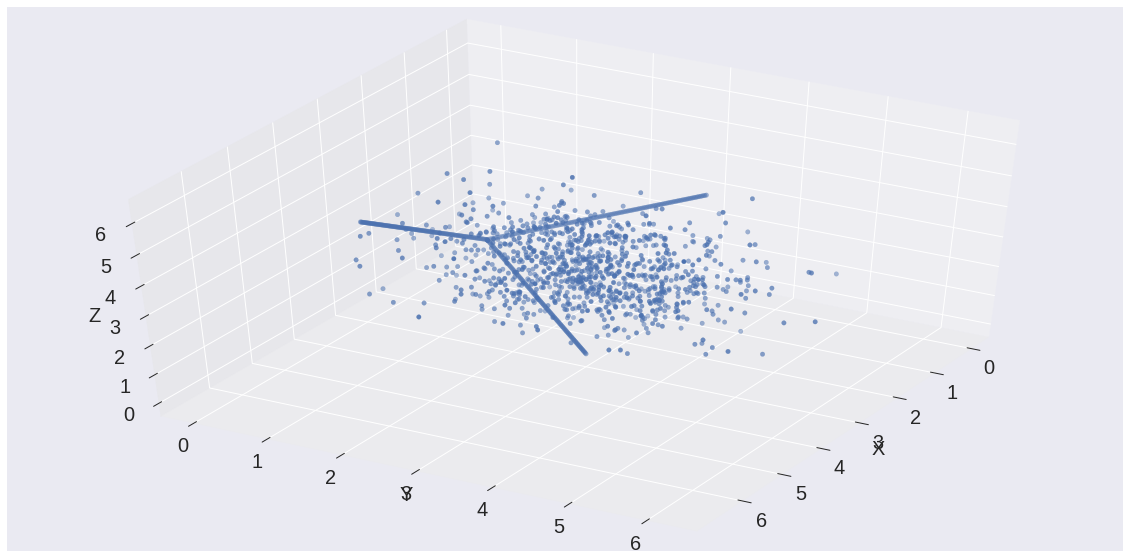

In [10]:
# Plot the original data in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample[:,0],sample[:,1],sample[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(45, 30)
plt.show()